In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
history = pd.read_csv("new_history.csv")

In [3]:
history.head()

,Hour,Temperature,Load
0,1,43.72,1384494.0
1,2,42.72,1392822.0
2,3,41.84,1407887.0
3,4,41.04,1438658.0
4,5,40.56,1484046.0


In [4]:
X = history[["Hour","Temperature"]]
y = history["Load"]

In [5]:
X.head()

,Hour,Temperature
0,1,43.72
1,2,42.72
2,3,41.84
3,4,41.04
4,5,40.56


In [6]:
y.head()

0    1384494.0
1    1392822.0
2    1407887.0
3    1438658.0
4    1484046.0
Name: Load, dtype: float64

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [8]:

# TEST ERROR PER DEGREE
test_rmse_errors = []
for d in range(1,15):
    # CREATE POLY DATA SET FOR DEGREE "d"
    polynomial_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    # TRAIN ON THIS NEW POLY SET
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    
    # PREDICT ON BOTH TRAIN AND TEST
    test_pred = model.predict(X_test)
    
    # Calculate Errors
    
    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    # Append errors to lists for plotting later

    test_rmse_errors.append(test_RMSE)

In [9]:
test_rmse_errors

[370989.0609608251,
 182744.18629742437,
 153822.90389093797,
 151747.74128277315,
 133479.29157052725,
 131952.3595699408,
 128097.46145001757,
 128630.38125262405,
 129017.5505017094,
 133353.57154158107,
 132803.29842372978,
 233045.31066547718,
 446920.759870031,
 475081.49405857665]

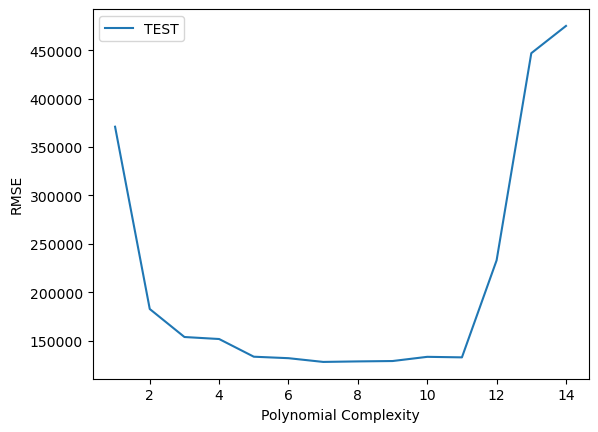

In [10]:

plt.plot(range(1,15),test_rmse_errors[:],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

In [11]:
    polynomial_converter = PolynomialFeatures(degree=7,include_bias=False)
    poly_features = polynomial_converter.fit_transform(X)
    
    # SPLIT THIS NEW POLY DATA SET
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)
    
    # TRAIN ON THIS NEW POLY SET
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    
    # PREDICT ON BOTH TRAIN AND TEST
    test_pred = model.predict(X_test)
    
    # Calculate Errors
    
    # Errors on Test Set
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))


Text(0.5, 0, 'Test Data')

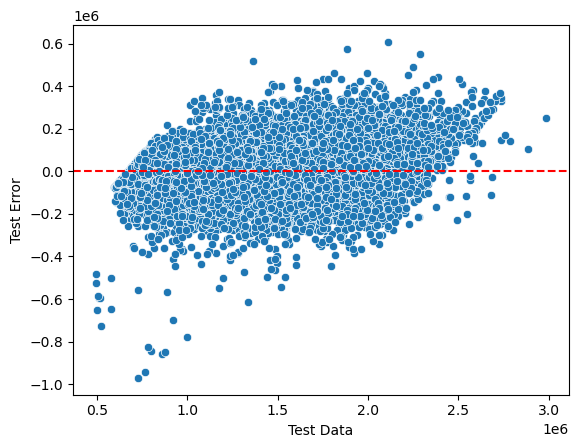

In [12]:

test_resd = y_test-test_pred
sns.scatterplot(x=y_test,y=test_resd)
plt.axhline(y=0, color='r', linestyle='--')
plt.ylabel("Test Error")
plt.xlabel("Test Data")

Text(0, 0.5, 'Predicted Load')

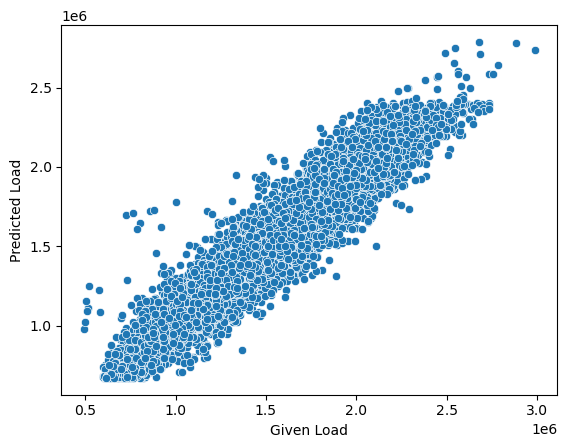

In [13]:
sns.scatterplot(x=y_test,y=test_pred)

plt.xlabel("Given Load")
plt.ylabel("Predicted Load")

In [14]:

test_RMSE

128097.46145001757

In [15]:
actual_test_mean=y_test.mean()
actual_test_mean

1340897.995674905

In [16]:
test_error_per =(test_RMSE/actual_test_mean)*100
test_error_per

9.553110069759121

In [17]:
# Based on our chart, could have also been degree=7, but 
# it is better to be on the safe side of complexity
final_poly_converter = PolynomialFeatures(degree=7,include_bias=False)

In [18]:
final_model = LinearRegression()

In [19]:
final_model.fit(final_poly_converter.fit_transform(X),y)

LinearRegression()

In [20]:
from joblib import dump, load

In [21]:
dump(final_model, 'Polynomial_Model_of_degree_7.joblib') 

['Polynomial_Model_of_degree_7.joblib']

In [22]:
dump(final_poly_converter,'poly_converter.joblib')

['poly_converter.joblib']

In [23]:
loaded_poly = load('poly_converter.joblib')
loaded_model = load('Polynomial_Model_of_degree_7.joblib')

In [24]:
data_to_be_predicted = pd.read_csv("data-to-be-forecast.csv")

In [25]:
data_to_be_predicted.head()

,Date,Hour,Temperature,Load
0,01-Jan-06,1,60.52,NaN
1,01-Jan-06,2,60.32,NaN
2,01-Jan-06,3,60.16,NaN
3,01-Jan-06,4,59.84,NaN
4,01-Jan-06,5,59.88,NaN


In [26]:
feature_values = data_to_be_predicted[["Hour","Temperature"]]

In [27]:
feature_values.head()

,Hour,Temperature
0,1,60.52
1,2,60.32
2,3,60.16
3,4,59.84
4,5,59.88


In [28]:
feature_values_poly = loaded_poly.transform(feature_values)

In [29]:
predicted_load=final_model.predict(feature_values_poly)

In [30]:
predicted_load

array([ 781743.79304026,  729533.68312533,  676700.5776271 , ...,
       1308516.81107332, 1159908.7762735 ,  974278.52527453])

In [31]:
data_to_be_predicted["Load"]=predicted_load

In [32]:
data_to_be_predicted.head()

,Date,Hour,Temperature,Load
0,01-Jan-06,1,60.52,781743.793040
1,01-Jan-06,2,60.32,729533.683125
2,01-Jan-06,3,60.16,676700.577627
3,01-Jan-06,4,59.84,678646.371629
4,01-Jan-06,5,59.88,741008.927229


In [33]:
data_to_be_predicted.to_csv("predicted_data_by_poly-Regression.csv",index=False)

In [34]:
history.tail()

,Hour,Temperature,Load
35059,20,64.12,1409813.0
35060,21,62.88,1309493.0
35061,22,61.80,1217706.0
35062,23,61.16,1127940.0
35063,24,60.80,1047116.0


In [35]:
data_to_be_predicted.tail()

,Date,Hour,Temperature,Load
8755,31-Dec-06,20,71.48,1.394043e+06
8756,31-Dec-06,21,70.88,1.387002e+06
8757,31-Dec-06,22,70.32,1.308517e+06
8758,31-Dec-06,23,69.84,1.159909e+06
8759,31-Dec-06,24,69.36,9.742785e+05


In [36]:
df = pd.read_csv("predicted_data_by_poly-Regression.csv")

In [37]:
df.tail()

,Date,Hour,Temperature,Load
8755,31-Dec-06,20,71.48,1.394043e+06
8756,31-Dec-06,21,70.88,1.387002e+06
8757,31-Dec-06,22,70.32,1.308517e+06
8758,31-Dec-06,23,69.84,1.159909e+06
8759,31-Dec-06,24,69.36,9.742785e+05


In [38]:
history.tail()

,Hour,Temperature,Load
35059,20,64.12,1409813.0
35060,21,62.88,1309493.0
35061,22,61.80,1217706.0
35062,23,61.16,1127940.0
35063,24,60.80,1047116.0
